# Word2Vec
: 단어 임베딩을 학습하기 위한 패키지
##### References:
Word2Vec 참고자료: https://radimrehurek.com/gensim/models/word2vec.html
<br>
딥러닝을 위한 자연어처리 입문: https://wikidocs.net/book/2155
<br>
Stanford cs224n 자료: http://web.stanford.edu/class/cs224n/

## Pretrained word embeddings
: 사전에 학습된 단어 임베딩을 살펴 봅시다!

In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# 사전에 학습된 단어 임베딩을 불러옵니다
# 해당 데이터는 "GloVe"로 스탠포드 대학에서 독자적으로 학습한 단어 임베딩입니다
# 이를 Word2Vec 패키지에서 사용할 수 있게 변환 후 사용합니다

glove_file = datapath('C:\\Users\\gram\\Desktop\\와이빅타\\21-1 DA\\신입 교육\\glove.6B.100d.txt')  # 해당 파일의 위치를 직접 입력해 주세요
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [4]:
# 모델을 불러옵니다
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [5]:
# 특정 단어 임베딩의 형태
model['banana']

array([-0.34028  ,  0.46436  , -0.083324 ,  0.20186  , -0.17831  ,
       -0.4663   ,  0.61793  ,  0.30129  ,  0.5728   , -0.34783  ,
       -0.9216   ,  0.30484  ,  0.30382  ,  0.58035  ,  0.12112  ,
        0.77288  ,  1.1547   , -0.576    ,  0.51471  ,  0.21552  ,
        0.21106  ,  0.67875  ,  1.1962   ,  0.11142  ,  0.50809  ,
        1.1873   ,  0.035288 , -0.88952  ,  0.042803 , -0.36714  ,
        0.37993  ,  0.61945  ,  1.0194   , -0.95084  , -0.0072258,
        0.69454  ,  0.38692  , -0.18544  ,  0.2885   , -0.81279  ,
       -0.46473  , -0.82623  ,  0.42778  , -0.14064  ,  0.30173  ,
        0.074418 , -0.40044  ,  0.33969  , -0.62917  , -0.054449 ,
       -0.78469  ,  0.2354   , -0.78359  ,  0.74708  , -0.31074  ,
       -0.07038  , -0.34623  ,  0.33849  ,  0.89621  ,  0.30288  ,
        0.012978 ,  0.020869 , -0.14436  , -0.40914  ,  0.16651  ,
       -0.88124  , -0.078419 ,  0.048156 ,  0.27032  , -0.81761  ,
        0.027778 ,  0.62487  ,  0.1549   , -0.15838  ,  0.0886

In [6]:
# 의미상 가장 가까운 단어
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [7]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [8]:
model.most_similar('man')

[('woman', 0.832349419593811),
 ('boy', 0.7914870977401733),
 ('one', 0.7788748741149902),
 ('person', 0.7526816129684448),
 ('another', 0.752223551273346),
 ('old', 0.7409117221832275),
 ('life', 0.7371696829795837),
 ('father', 0.7370322942733765),
 ('turned', 0.7347694635391235),
 ('who', 0.7345511317253113)]

In [9]:
# 단어 연산 예시
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [10]:
result = model.most_similar(positive=['korea', 'paris'], negative=['seoul'])
print("{}: {:.4f}".format(*result[0]))

france: 0.8746


In [11]:
# 단어간 비유를 해보자
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [12]:
analogy('korea', 'korean', 'australia')

'australian'

In [13]:
analogy('germany', 'beer', 'france')

'wine'

In [14]:
analogy('tall', 'tallest', 'long')

'longest'

In [15]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [16]:
# 가장 어울리지 않는 단어 색출
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [17]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


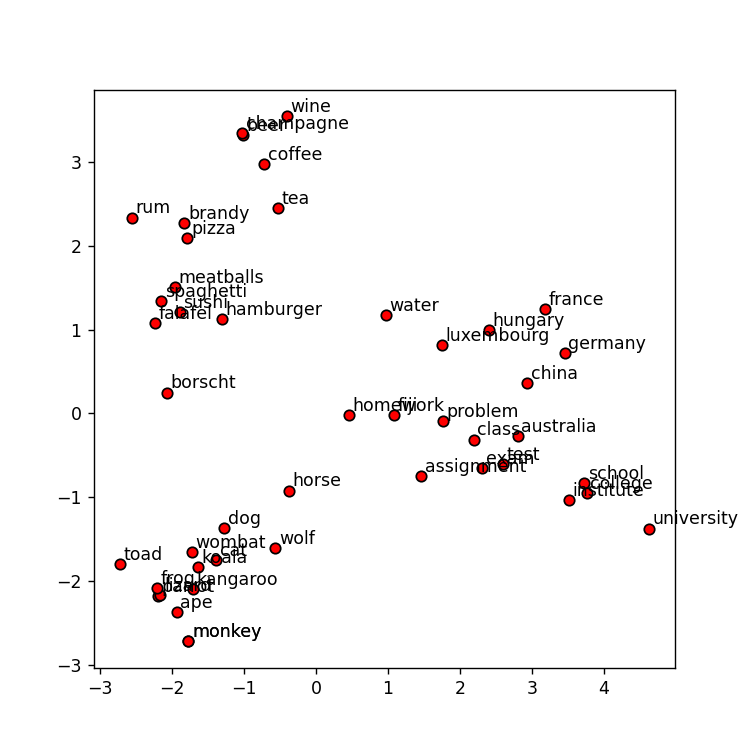

In [18]:
# 단어 임베딩 시각화
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

## Word2Vec 직접 학습 해보기
: 분석기에 따라 사용할 수 있는 함수가 조금씩 다릅니다.<br>
##### 네이버의 영화 리뷰 데이터로 학습 해보겠습니다.
##### 한국어 데이터이므로 KoNLPy로 토큰화 후에 Word2Vec으로 단어 임베딩을 학습합니다.<br>

##### 데이터 출처:
Naver sentiment movie corpus: https://github.com/e9t/nsmc/

In [19]:
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [21]:
# 데이터 불러오기
movie_data = pd.read_table('C:\\Users\\gram\\Desktop\\와이빅타\\21-1 DA\\신입 교육\\ratings.txt')

In [22]:
movie_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [23]:
# 결측치 제거
movie_data.dropna(inplace=True)

In [24]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [25]:
# 한글 외 문자 제거
movie_data['document'] = movie_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [26]:
movie_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [27]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [28]:
# Okt를 사용한 토큰화 작업 및 stopwords 제거
okt = Okt()
tokenized_data = []
for sentence in movie_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


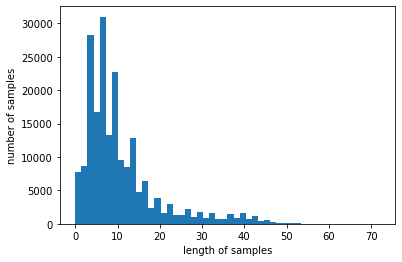

In [29]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [30]:
# Word2Vec 모델 학습시키기

from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [31]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [32]:
model.wv['아름답다']

array([-0.5180502 ,  0.6598783 , -0.5137467 , -1.1833763 ,  0.4549737 ,
       -0.3678858 , -0.01723727, -1.9154675 ,  0.8986612 ,  0.32654402,
       -0.5692081 , -2.2573435 , -0.5842949 ,  0.12159289, -0.4222634 ,
        0.01752578, -0.10369518,  1.0719602 ,  0.52740264, -1.4625949 ,
        1.4449162 , -2.3538475 , -1.6341274 ,  0.14785928,  0.19894847,
        1.4028684 , -0.9852006 , -0.4340017 ,  0.55120605,  0.349128  ,
       -1.3651057 , -0.79438496, -2.082111  , -1.739968  ,  1.5848168 ,
        1.3095796 ,  0.19070417,  1.6993709 ,  0.76545495, -0.44798666,
        0.14167568, -0.88379973,  1.0296522 , -1.413814  , -0.5838227 ,
       -0.6068551 ,  0.5241851 , -1.2247089 ,  0.47204134, -1.1530404 ,
       -0.73674685, -0.690228  ,  0.01682815,  0.25775826,  0.8376362 ,
        1.5139041 ,  0.3270404 , -1.3944497 ,  2.0323942 ,  1.3959945 ,
       -1.6240726 , -0.76559913, -1.0371737 ,  0.8250459 ,  1.250013  ,
        0.8771481 ,  1.5033991 ,  2.3037913 ,  1.5683353 ,  0.38

In [33]:
print(model.wv.most_similar("아름답다"))

[('사랑스럽다', 0.723093569278717), ('순수하다', 0.6883080005645752), ('쓸쓸하다', 0.6675792336463928), ('처절하다', 0.6472553014755249), ('애틋하다', 0.6432672142982483), ('뜨겁다', 0.638555645942688), ('애잔하다', 0.6349892616271973), ('흥겹다', 0.6302186846733093), ('풍경', 0.629530131816864), ('안타깝다', 0.6166267395019531)]


In [34]:
print(model.wv.most_similar("평점"))

[('평', 0.8257479667663574), ('점수', 0.8076332807540894), ('평정', 0.7676838636398315), ('댓글', 0.7280048727989197), ('평이', 0.7255051136016846), ('리뷰', 0.6823663115501404), ('수위', 0.6773098707199097), ('평론', 0.6540099382400513), ('평가', 0.6382112503051758), ('악평', 0.5951497554779053)]


In [35]:
print(model.wv.most_similar("송강호"))

[('설경구', 0.8975592255592346), ('차승원', 0.895277738571167), ('류승범', 0.8906619548797607), ('김혜수', 0.8814238905906677), ('디카프리오', 0.8813457489013672), ('엄정화', 0.8738111257553101), ('신하균', 0.8675880432128906), ('한석규', 0.859011709690094), ('황정민', 0.8571609854698181), ('최민식', 0.845702052116394)]
